**IMPORTING THE DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
import seaborn as sns
warnings.filterwarnings('ignore') # Turn off warnings
plt.style.use('seaborn-white') # Use seaborn-style plots
plt.rcParams.update({'font.size': 15}) # Set larger default plot font size
%matplotlib inline

In [ ]:
users = pd.read_csv('/content/Users.csv')
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(f'Users: {len(users)}\nBooks: {len(books)}\nRatings: {len(ratings)}')


Users: 278858
Books: 271360
Ratings: 1149780


**INVESTIGATING USERS DATASET**

In [ ]:
users.columns = users.columns.str.strip().str.lower().str.replace('-', '_')
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.dtypes

user_id       int64
location     object
age         float64
dtype: object

In [ ]:
uniq_users = users.user_id.nunique()
all_users = users.user_id.count()
print(f'No. of unique user_id entries: {uniq_users} | Total user_id entries: {all_users}')

No. of unique user_id entries: 278858 | Total user_id entries: 278858


The 'User-ID' field is integers, 'Location' are strings', and the 'Age' values are floats.

We can probably change the ages to ints. Let's take a look at the values first.

In [ ]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

The age range goes from 0 to 244 years old! Obviously this cannot be correct; I'll set all ages less than 5 and older than 100 to NaN to try keep them realistic.

In [ ]:
users.loc[(users.age<5) | (users.age>100), 'age'] = np.nan

In [ ]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Now let's have a look at the entire age range again.

In [ ]:
print(sorted(users.age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


Much better - now the ages go from 5 to 100, with missing values entered as NaN. Let's plot this to see how they are distributed.

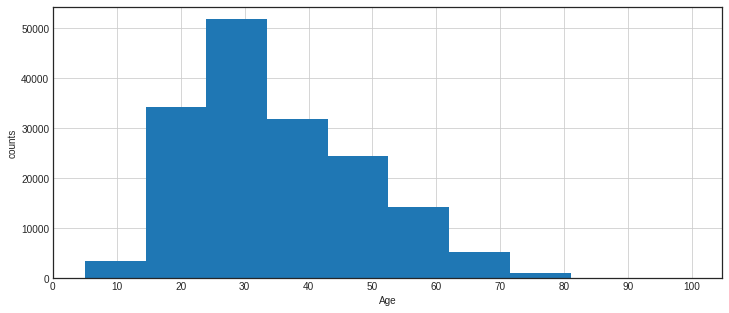

In [ ]:
# First create a histogram of the Age field
ax = users.age.hist(bins=10, figsize=(12,5))
ax.set_xlabel('Age')
ax.set_ylabel('counts')
ax.set_xticks(range(0,110,10))
plt.show()

Below is the same plot without any binning - i.e. each age is represented individually.

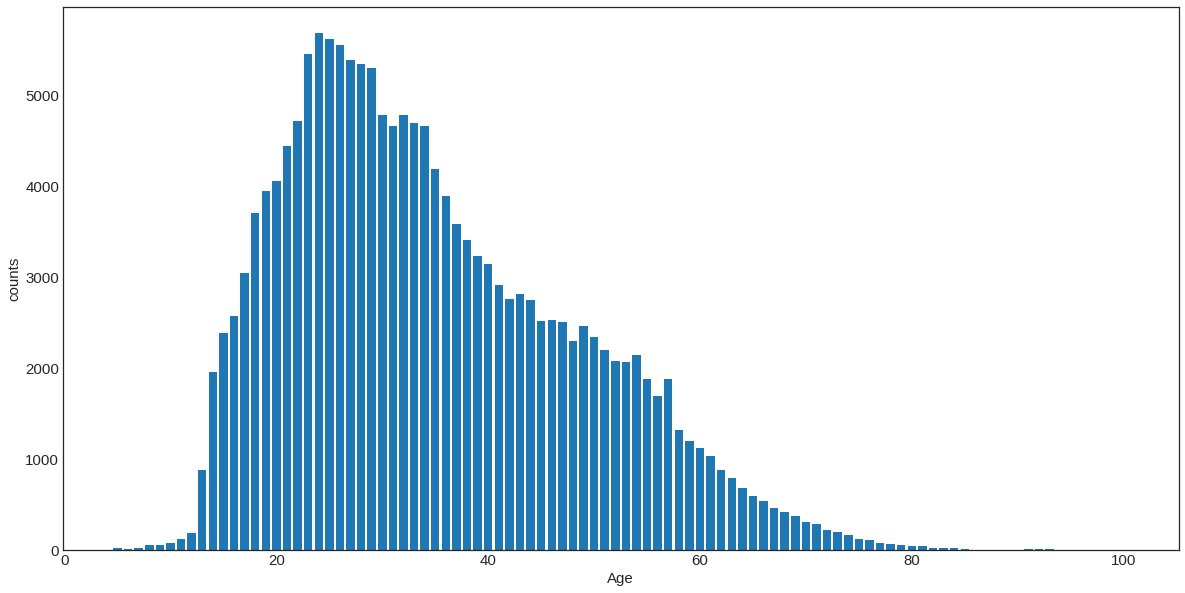

In [ ]:
u = users.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

That is more clear to me! It seems that most of our reviewers are in their late 20s to early 30s.

How many missing Age's do we now have in the dataset?

In [ ]:
age_null = users.age.isnull().sum() # Sums up the 1's returned by the isnull() mask
all_users = users.user_id.count() # Counts the number of cells in the series - excludes NaNs!
print(f'There are {age_null} empty age values in our set of {all_users} users (or {(age_null/all_users)*100:.2f}%).')

There are 112010 empty age values in our set of 278858 users (or 40.17%).


In [ ]:
users['age'].fillna(users.age.mean(),inplace=True)
users.age.isna().sum()

0

Next, can we expand the 'Location' field to break it up into 'City', 'State', and 'Country'.

In [ ]:
user_location_expanded = users.location.str.split(',', 2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)

In [ ]:
users.drop(columns=['location'], inplace=True)
users.head()

,user_id,age,city,state,country
0,1,34.746638,nyc,new york,usa
1,2,18.000000,stockton,california,usa
2,3,34.746638,moscow,yukon territory,russia
3,4,17.000000,porto,v.n.gaia,portugal
4,5,34.746638,farnborough,hants,united kingdom


Let's take a quick look at these Location-derived fields.

In [ ]:
top_cities = users.city.value_counts()[:10]
print(f'The 10 cities with the most users are:\n{top_cities}')

The 10 cities with the most users are:
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: city, dtype: int64


Text(0.5, 1.0, 'City-wise Count of Users')

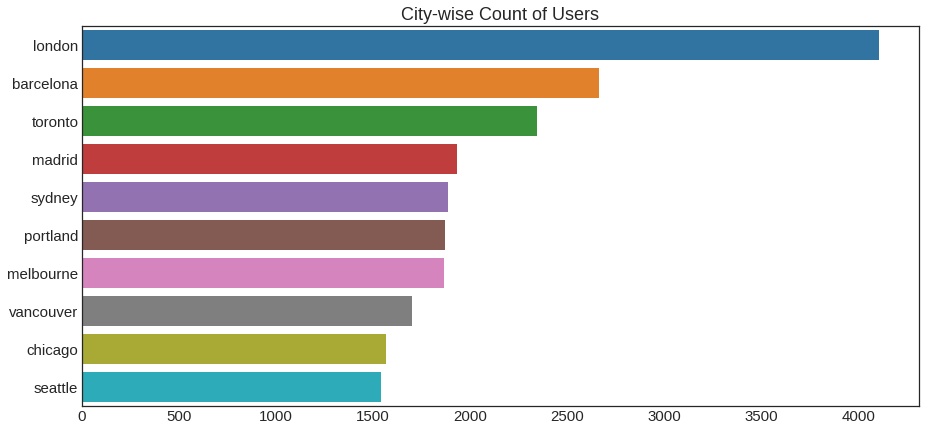

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=top_cities.index,x=top_cities.values)
plt.title('City-wise Count of Users')

In [ ]:
top_countries = users.country.value_counts()[:10]
print(f'The 10 countries with the most users are:\n{top_countries}')

The 10 countries with the most users are:
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
                     4561
 france              3440
 portugal            3305
Name: country, dtype: int64


Text(0.5, 1.0, 'Country-wise Count of Users')

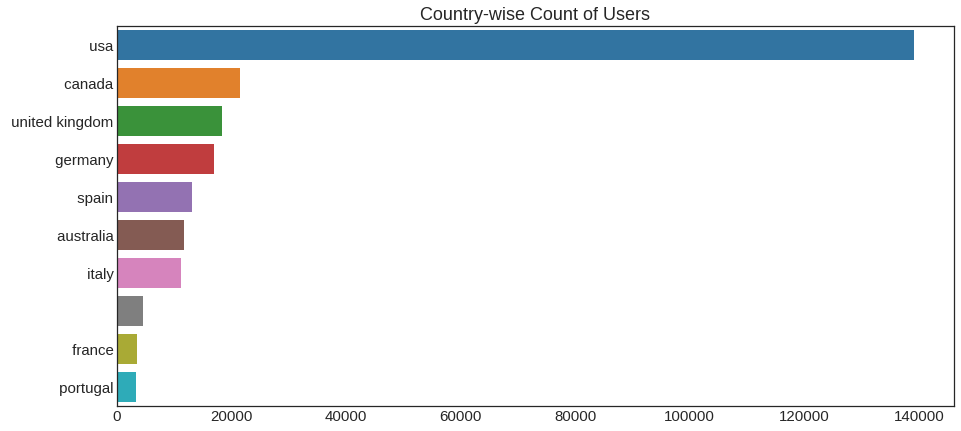

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=top_countries.index,x=top_countries.values)
plt.title('Country-wise Count of Users')

It looks like an empty 'Country' field is in the top 10 most common entries!

In [ ]:
empty_string_country = users[users.country == ''].country.count()
nan_country = users.country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')

There are 4561 entries with empty strings, and 2 NaN entries in the Country field


We should probably change these empty strings to NaNs.

In [ ]:
users.country.replace('', np.nan, inplace=True)
users.isna().sum()

user_id       0
age           0
city          0
state         1
country    4563
dtype: int64

In [ ]:
users['age'] = users['age'].astype('int64')

**Investigate the 'books' dataframe**

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


First, let's tidy up the column names. And we can probably drop the image-url link columns.

In [ ]:
books.columns = books.columns.str.strip().str.lower().str.replace('-', '_') # clean column names
books.drop(columns=['image_url_s', 'image_url_m', 'image_url_l'], inplace=True) # drop image-url columns
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


What about the 'type' of each field? We probably want Year of Publication to be ints or floats, and the rest to be strings ('object'). Note: The ISBN numbers may contain some letters, so we CAN'T convert them to numeric values. Will leave as strings.

In [ ]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [ ]:
# Convert years to float
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

In [ ]:
# Check for 0's or NaNs in Year of Publication
zero_yr = books[books.year_of_publication == 0].year_of_publication.count()
nan_yr = books.year_of_publication.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


In [ ]:
# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

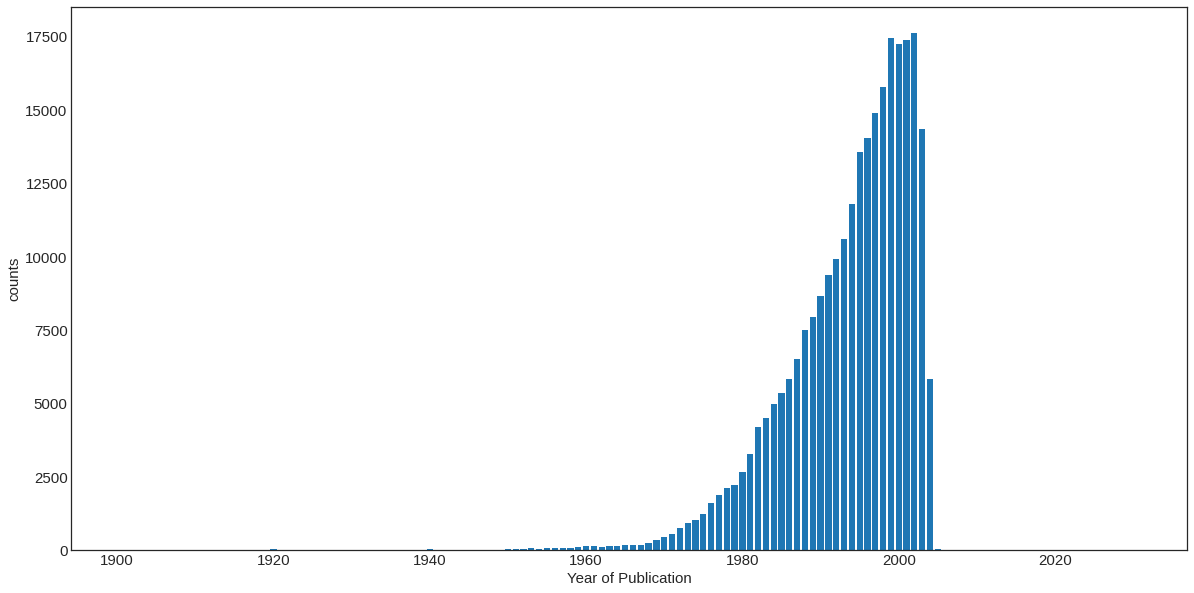

In [ ]:
yr = books.year_of_publication.value_counts().sort_index()
yr = yr.where(yr>5) # filter out counts less than 5
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(yr.index, yr.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

Note that in the plot above we filtered out counts less than 5, as there are a few books in the dataset with publication years in the 1300s, and a few in the future (?!). The plot above show the general trend that more recent books are much more frequent.

Let's take a look at some of those 'outlier' books. Maybe we'll even keep them as a separate dataset so we can filter them out if we need to later in the analysis. We'll leave them in for now, and then figure out how to handle them once we have more info later on.

In [ ]:
historical_books = books[books.year_of_publication<1900] # create df of old books
books_from_the_future = books[books.year_of_publication>2023] # create df of books with publication yrs in the future!

hist_books_mini = historical_books[['book_title', 'year_of_publication']]
future_books_mini = books_from_the_future[['book_title', 'year_of_publication']]
print(f'Historical books:\n{hist_books_mini}')
print('\n')
print(f'Future books:\n{future_books_mini}')


Historical books:
                                               book_title  year_of_publication
171817  Complete Works 10 Volumes [2,6,7,8,9] (Notable...               1806.0
227531                   Dalan-i bihisht (Dastan-i Irani)               1378.0
245607  Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...               1897.0
253750                                       Tasht-i khun               1376.0


Future books:
                                               book_title  year_of_publication
37487   MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...               2030.0
55676   MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...               2030.0
78168                                    Crossing America               2030.0
80264   Alice's Adventures in Wonderland and Through t...               2050.0
97826       Outline of European Architecture (Pelican S.)               2050.0
116053                       Three Plays of Eugene Oneill               2038.0
118294        Das 

I think we can probably omit the 'historical_books' as they may potentially skew the model and do not seem to have much relevance to the wider userbase.

Some of the 'future' books actually appear to be errors (e.g. Alice in Wonderland, Edgar Allen Poe, etc.)... Perhaps they were supposed to be e.g. 1950 instead of 2050? However, instead of investigating this further, since there are books here I will simply remove them from the 'books' table.

In [ ]:
print(f'Length of books dataset before removal: {len(books)}')
books = books.loc[~(books.isbn.isin(historical_books.isbn))] # remove historical books
books = books.loc[~(books.isbn.isin(books_from_the_future.isbn))] # remove future books
print(f'Length of books dataset after removal: {len(books)}')

Length of books dataset before removal: 271360
Length of books dataset after removal: 271343


We clean up the ampersand formatting in the Publisher field.

In [ ]:
books.publisher = books.publisher.str.replace('&;', '&', regex=False)
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


Check that there are no duplicated book entries.

In [ ]:
uniq_books = books.isbn.nunique()
all_books = books.isbn.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271343 | All book entries: 271343


Let's look at the most frequent Publishing houses in the dataset.



In [ ]:
top_publishers = books.publisher.value_counts()[:10]
print(f'The 10 publishers with the most entries in the books table are:\n{top_publishers}')

The 10 publishers with the most entries in the books table are:
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2969
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64


Text(0.5, 1.0, 'Top count of Publishers')

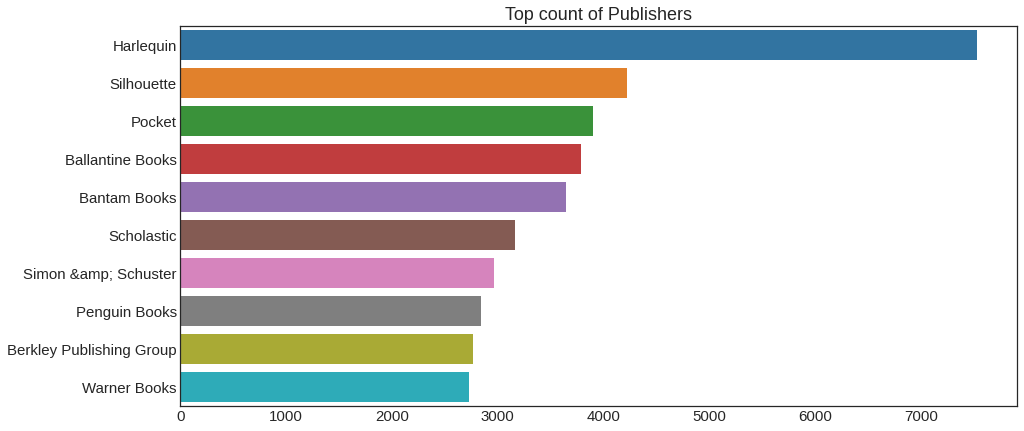

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=top_publishers.index,x=top_publishers.values)
plt.title('Top count of Publishers')

In [ ]:
top_authors = books.book_author.value_counts()[:10]
print(f'The 10 authors with the most entries in the books table are:\n{top_authors}')

The 10 authors with the most entries in the books table are:
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: book_author, dtype: int64


Text(0.5, 1.0, 'Top count of Authors')

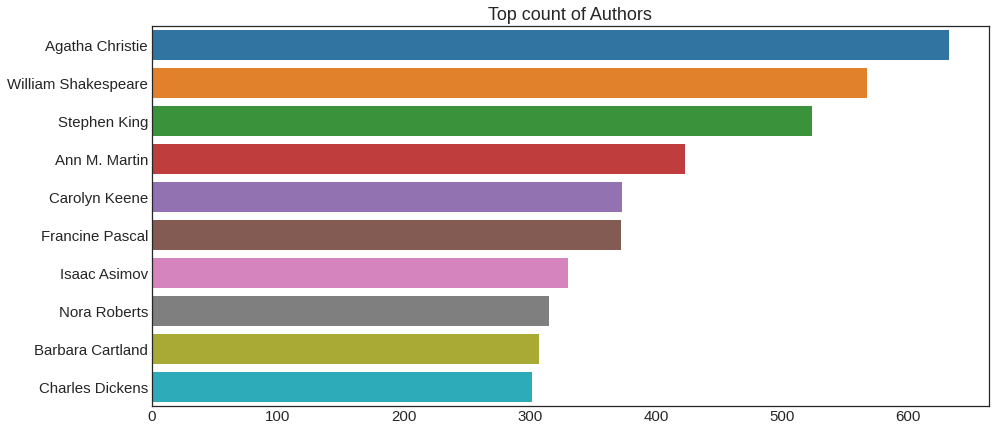

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=top_authors.index,x=top_authors.values)
plt.title('Top count of Authors')

We should search for empty or NaN values in these fields too.

In [ ]:
empty_string_publisher = books[books.publisher == ''].publisher.count()
nan_publisher = books.publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')

There are 0 entries with empty strings, and 2 NaN entries in the Publisher field


Great - no empty strings in the Publisher field, and 2 NaN.

In [ ]:
empty_string_author = books[books.book_author == ''].book_author.count()
nan_author = books.book_author.isnull().sum()
print(f'There are {empty_string_author} entries with empty strings, and {nan_author} NaN entries in the Author field')

There are 0 entries with empty strings, and 1 NaN entries in the Author field


In [ ]:
top_titles = books.book_title.value_counts()[:10]
print(f'The 10 book titles with the most entries in the books table are:\n{top_titles}')

The 10 book titles with the most entries in the books table are:
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Dracula                           20
The Secret Garden                 20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: book_title, dtype: int64


This is actually quite an important observation. Although all of the ISBN entries are unique in the 'books' dataframe, different forms of the same book will have different ISBNs - i.e. paperback, e-book, etc. Therefore, we can see that some books have multiple ISBN entries (e.g. Jane Eyre has 12 different ISBNs, each corresponding to a different version of the book).

Let's take a look at, for example, the entries for 'Jane Eyre'.

In [ ]:
books[books.book_title=='Jane Eyre']

,isbn,book_title,book_author,year_of_publication,publisher
3323,0451518845,Jane Eyre,Charlotte Bronte,1999.0,New Amer Library Classics
9545,0451523326,Jane Eyre,Charlotte Bronte,1988.0,Signet Classics
27657,1566193028,Jane Eyre,Charlotte Bronte,1994.0,Dorset Press
28501,156619024X,Jane Eyre,Charlotte Bronte,NaN,Barnes Noble Classics
40050,8426102069,Jane Eyre,Charlotte Bronte,1997.0,Juventud
41265,0553210203,Jane Eyre,Charlotte Bronte,1981.0,Bantam Books
58243,0460012878,Jane Eyre,Charlotte Bronte,1976.0,J m Dent &amp; Sons Ltd
69689,0141305371,Jane Eyre,Charlotte Bronte,1999.0,Puffin Books
72306,2253004359,Jane Eyre,Charlotte BrontÃ?Â«,1991.0,LGF
84642,0812523377,Jane Eyre,Charlotte Bronte,1994.0,Tor Books


It looks like each ISBN assigned to the book 'Jane Eyre' has different Publisher and Year of Publication values also.

It might be more useful for our model if we simplified this to give each book a unique identifier, independent of the book format, as our recommendations will be for a book, not a specific version of a book. Therefore, all values in the Jane Eyre example above would stay the same, except all of the Jane Eyre entries would additionally be assigned a unique ISBN code as a new field.

**Will create this more unique identifier under the field name 'unique_isbn'. Note that entries with only a single ISBN number will be left the same. However, will need to do this after joining to the other tables in the dataset, as some ISBNs in the 'book-rating' table may be removed if done prior.**

**INVESTIGATING BOOK_RATINGS TABLE**

Again, let's tidy up the column names.

In [ ]:
ratings.columns = ratings.columns.str.strip().str.lower().str.replace('-', '_')
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

The data types already look good. Remember that the ISBN numbers may contain letters, and so should be left as strings.

Which users contribute the most ratings?

In [ ]:
super_users = ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print(f'The 20 users with the most ratings:\n{super_users[:20]}')

The 20 users with the most ratings:
user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
230522     2991
16795      2948
234623     2674
36836      2529
52584      2512
245963     2507
204864     2504
55492      2459
185233     2448
171118     2421
Name: isbn, dtype: int64


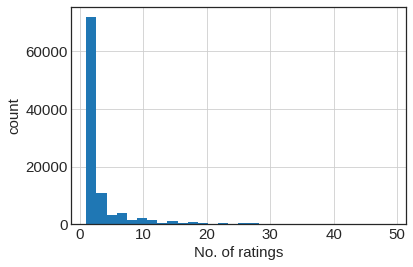

In [ ]:
# user distribution - users with more than 50 ratings removed
user_hist = super_users.where(super_users<50)
user_hist.hist(bins=30)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()

It looks like by far the most frequent events are users with only 1 or 2 rating entries. We can see that the 'super users' with thousands of ratings are significant outliers.

This becomes clear if we make the same histogram with a cutoff for users with a minimum of 1000 ratings.

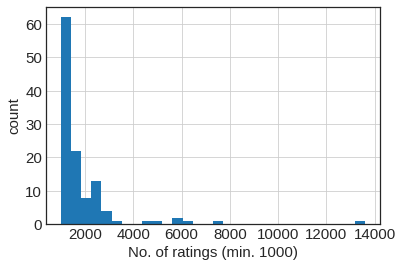

In [ ]:
# only users with more than 1000 ratings
super_user_hist = super_users.where(super_users>1000)
super_user_hist.hist(bins=30)
plt.xlabel('No. of ratings (min. 1000)')
plt.ylabel('count')
plt.show()

Let's see what the distribution of ratings looks like.

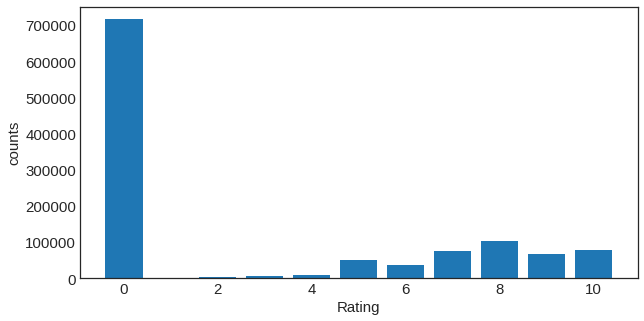

In [ ]:
rtg = ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

Seems like most of the entries have a rating of zero!

After doing some research on the internet regarding this (and similar) datasets, it appears that the rating scale is actually from 1 to 10, and a 0 indicates an 'implicit' rather than an 'explicit' rating. An implicit rating represents an interaction (may be positive or negative) between the user and the item. Implicit interactions usually need to be handled differently from explicit ones.

For the modeling step we'll only be looking at explicit ratings, and so the 0 rating entry rows will be removed

In [ ]:
print(f'Size of book_ratings before removing zero ratings: {len(ratings)}')
ratings = ratings[ratings.book_rating != 0]
print(f'Size of book_ratings after removing zero ratings: {len(ratings)}')


Size of book_ratings before removing zero ratings: 1149780
Size of book_ratings after removing zero ratings: 433671


By removing the implicit ratings we have reduced our sample size by more than half.

Let's look at how the ratings are distributed again.

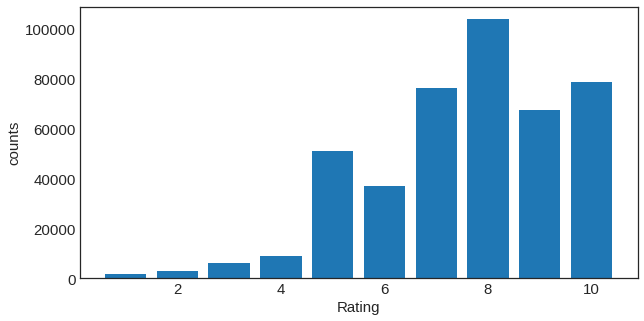

In [ ]:
rtg = ratings.book_rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

This is much more clear! Now we can see that 8 is the most frequent rating, while users tend to give ratings > 5, with very few low ratings given.

**JOINING BOOKS WITH BOOK_RATINGS TABLE**



In [ ]:
print(f'Books table size: {len(books)}')
print(f'Ratings table size: {len(ratings)}')
books_with_ratings = ratings.join(books.set_index('isbn'), on='isbn')
print(f'New table size: {len(books_with_ratings)}')

Books table size: 271343
Ratings table size: 433671
New table size: 433671


In [ ]:
books_with_ratings.tail()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
1149773,276704,0806917695,5,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997.0,Sterling Publishing
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic
1149779,276723,05162443314,8,NaN,NaN,NaN,NaN


In [ ]:
print(f'There are {books_with_ratings.book_title.isnull().sum()} books with no title/author information.')
print(f'This represents {len(books_with_ratings)/books_with_ratings.book_title.isnull().sum():.2f}% of the ratings dataset.')

There are 49856 books with no title/author information.
This represents 8.70% of the ratings dataset.


There seems to be quite a few ISBNs in the ratings table that did not match an ISBN in the books table, almost 9% of all entries!

There isn't really anything we can do about that, but we should really remove them from the dataset as we won't be able to access the title of the book to make a recommendation even if the model can use them.

In [ ]:
books_with_ratings.isnull().sum()

user_id                    0
isbn                       0
book_rating                0
book_title             49856
book_author            49857
year_of_publication    55640
publisher              49858
dtype: int64

It looks like the year_of_publication field contains the most NaN entries, while user_id, isbn, and book_rating are full. The book_title, book_author, and publisher fields contain approximately the same number of missing entries.

We'll choose to remove rows for which the book_title is empty, as this is the most crucial piece of data needed to identify the book.

In [ ]:
books_with_ratings.dropna(subset=['book_title'], inplace=True) 

Let's see which books have the highest cumulative book rating values.

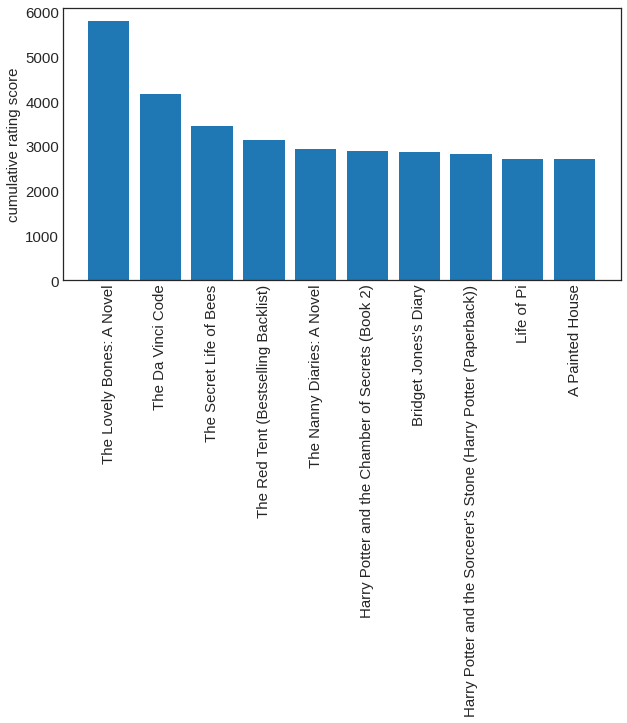

In [ ]:
cm_rtg = books_with_ratings.groupby('book_title').book_rating.sum()
cm_rtg = cm_rtg.sort_values(ascending=False)[:10]
idx = cm_rtg.index.tolist() # Get sorted book titles
vals = cm_rtg.values.tolist() # Get corresponding cm_rtg values

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15})
plt.bar(range(len(idx)), vals)
plt.xticks(range(len(idx)), idx, rotation='vertical')
plt.ylabel('cumulative rating score')
plt.show()

Titles with highest average ratings (with a minimum of at least 50 ratings recieved)

In [ ]:
cutoff = books_with_ratings.book_title.value_counts()
mean_rtg = books_with_ratings[books_with_ratings.book_title.isin(cutoff[cutoff>50].index)].groupby('book_title')['book_rating'].mean()
mean_rtg_10 = mean_rtg.sort_values(ascending=False)[:10] # show only top 10
mean_rtg_10

book_title
The Two Towers (The Lord of the Rings, Part 2)            9.330882
The Return of the King (The Lord of the Rings, Part 3)    9.213592
Harry Potter and the Goblet of Fire (Book 4)              9.125506
The Little Prince                                         9.111111
Charlotte's Web (Trophy Newbery)                          9.073529
Harry Potter and the Sorcerer's Stone (Book 1)            9.062500
84 Charing Cross Road                                     9.049180
Harry Potter and the Order of the Phoenix (Book 5)        9.047393
Harry Potter and the Prisoner of Azkaban (Book 3)         9.043321
To Kill a Mockingbird                                     8.977528
Name: book_rating, dtype: float64

Text(0.5, 1.0, 'Titles with the highest average rating')

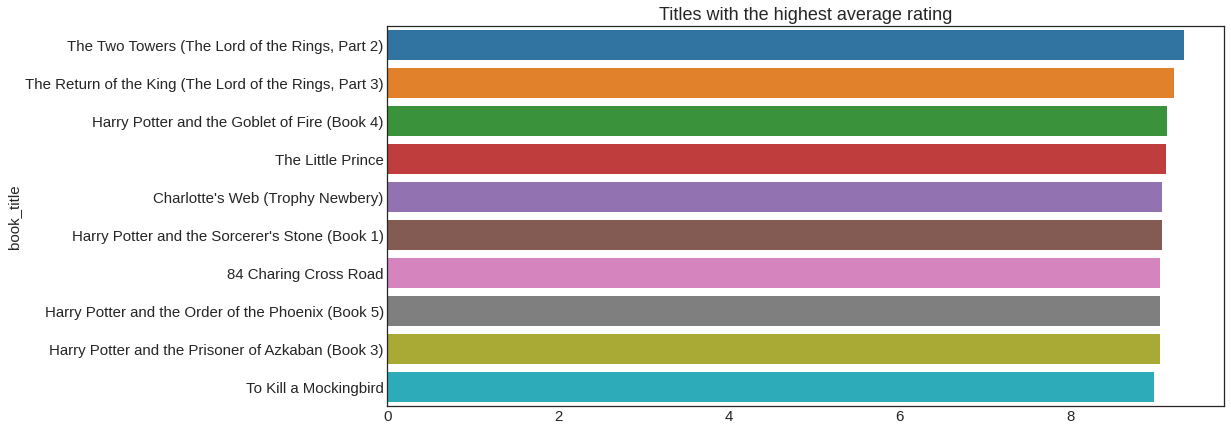

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y=mean_rtg_10.index,x=mean_rtg_10.values)
plt.title('Titles with the highest average rating')

Books with lowest rating

In [ ]:
mean_rtg.sort_values(ascending=False)[-10:] 

book_title
Slow Waltz in Cedar Bend                                  6.619718
My Gal Sunday                                             6.607843
Hornet's Nest                                             6.591398
Bleachers                                                 6.583333
Full Tilt (Janet Evanovich's Full Series)                 6.568627
Songs in Ordinary Time (Oprah's Book Club (Paperback))    6.530303
4 Blondes                                                 5.653846
Isle of Dogs                                              5.433962
Four Blondes                                              5.393939
Wild Animus                                               4.390706
Name: book_rating, dtype: float64

Seems like the lowest average rating in the dataset is only a 4.39 - and all the rest of the books have average ratings higher than 5.

**Restrict books to a "single ISBN per book" (regardless of format)**

In [ ]:
books_with_ratings.groupby('book_title').isbn.nunique().sort_values(ascending=False)[:10]

book_title
The Secret Garden                 18
Selected Poems                    16
Adventures of Huckleberry Finn    15
Dracula                           15
Little Women                      14
Jane Eyre                         14
Beloved                           14
Pride and Prejudice               14
Wuthering Heights                 14
The Hobbit                        12
Name: isbn, dtype: int64

In [ ]:
multiple_isbns = books_with_ratings.groupby('book_title').isbn.nunique()
multiple_isbns.value_counts()

1     125324
2       7872
3       1497
4        493
5        181
6         86
7         43
8         28
9         11
10         8
14         5
15         2
11         2
16         1
12         1
18         1
Name: isbn, dtype: int64

We can see that the vast majority of books have less only 1 associated ISBN number, however quite a few multiple ISBNs. We want to create a unique_isbn such that a single book will only have 1 identifier when fed to the recommendation model.

In [ ]:
has_mult_isbns = multiple_isbns.where(multiple_isbns>1)
has_mult_isbns.dropna(inplace=True) # remove NaNs, which in this case is books with a single ISBN number

In [ ]:
print(f'There are {len(has_mult_isbns)} book titles with multiple ISBN numbers which we will try to re-assign to a unique identifier')

There are 10231 book titles with multiple ISBN numbers which we will try to re-assign to a unique identifier


In [ ]:
has_mult_isbns['Jane Eyre']

14.0

In [ ]:
# Create dictionary for books with multiple isbns
def make_isbn_dict(df):
     title_isbn_dict = {}
     for title in has_mult_isbns.index:
         isbn_series = df.loc[df.book_title==title].isbn.unique() # returns only the unique ISBNs
         title_isbn_dict[title] = isbn_series.tolist()
     return title_isbn_dict

%time dict_unique_isbn = make_isbn_dict(books_with_ratings)


CPU times: user 8min 2s, sys: 1.61 s, total: 8min 4s
Wall time: 8min 4s


In [ ]:
# As the loop takes a while to run (10 min on the full dataset), pickle this dict for future use
with open('multiple_isbn_dict.pickle', 'wb') as handle:
     pickle.dump(dict_unique_isbn, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# LOAD isbn_dict back into namespace
with open('multiple_isbn_dict.pickle', 'rb') as handle:
    multiple_isbn_dict = pickle.load(handle)

In [ ]:
print(f'There are now {len(multiple_isbn_dict)} books in the ISBN dictionary that have multiple ISBN numbers')

There are now 10231 books in the ISBN dictionary that have multiple ISBN numbers


Let's take a quick look in the dict we just created for the 'Jane Eyre' entry - it should contain a list of 10 ISBN numbers.

In [ ]:
print(f'Length of Jane Eyre dict entry: {len(multiple_isbn_dict["Jane Eyre"])}\n')
multiple_isbn_dict['Jane Eyre']

Length of Jane Eyre dict entry: 14



['1590071212',
 '0451518845',
 '0451523326',
 '843761449X',
 '156619024X',
 '8426102069',
 '1566193028',
 '0141305371',
 '3548301231',
 '0812523377',
 '0517668432',
 '2253004359',
 '0553210203',
 '0451515560']

As I don't really know what each of the different ISBN numbers refers to (from what I understand the code actually signifies various things including publisher, year, type of print, etc, but decoding this is outside the scope of this analysis), I'll just select the first ISBN number that appears in the list of values to set as our unique_isbn for that particular book.

Note: ISBN numbers are currently 13 digits long, but used to be 10. Any ISBN that isn't 10 or 13 digits long is probably an error that should be handled somehow. Any that are 9 digits long might actually be SBN numbers (pre-1970), and can be converted into ISBN's by just pre-fixing with a zero.

In [ ]:
# Add 'unique_isbn' column to 'books_with_ratings' dataframe that includes the first ISBN if multiple ISBNS,
# or just the ISBN if only 1 ISBN present anyway.
def add_unique_isbn_col(df):
    df['unique_isbn'] = df.apply(lambda row: multiple_isbn_dict[row.book_title][0] if row.book_title in multiple_isbn_dict.keys() else row.isbn, axis=1)
    return df

%time books_with_ratings = add_unique_isbn_col(books_with_ratings)

CPU times: user 7.14 s, sys: 87 ms, total: 7.23 s
Wall time: 7.26 s


In [ ]:
books_with_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794


The table now includes our unique_isbn field.

Let's check to see if the 'Jane Eyre' entries have been assigned the ISBN '0451518845', which was the first val in the dictionary for this title.

In [ ]:
books_with_ratings[books_with_ratings.book_title=='Jane Eyre'].head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn
10481,387,1590071212,9,Jane Eyre,Charlotte Bronte,2002.0,New Millenium Audio,1590071212
16178,2718,0451518845,10,Jane Eyre,Charlotte Bronte,1999.0,New Amer Library Classics,1590071212
35499,8370,0451523326,8,Jane Eyre,Charlotte Bronte,1988.0,Signet Classics,1590071212
50842,11676,0451523326,9,Jane Eyre,Charlotte Bronte,1988.0,Signet Classics,1590071212
58066,11676,843761449X,8,Jane Eyre,Charlotte Bronte,1998.0,Ediciones Catedra S.A.,1590071212


Great! Seems to have worked well.

We won't replace the original ISBN column with the 'unique_isbn' column, but just note that the recommendation model should be based on the 'unique_isbn' field.

**Join the 'users' table on the 'user_id' field**

In [ ]:
print(f'Books+Ratings table size: {len(books_with_ratings)}')
print(f'Users table size: {len(users)}')
books_users_ratings = books_with_ratings.join(users.set_index('user_id'), on='user_id')
print(f'New "books_users_ratings" table size: {len(books_users_ratings)}')

Books+Ratings table size: 383815
Users table size: 278858
New "books_users_ratings" table size: 383815


Inspect the new table.

In [ ]:
books_users_ratings.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,unique_isbn,age,city,state,country
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,0155061224,34,seattle,washington,usa
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,052165615X,16,rijeka,n/a,croatia
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,0521795028,16,rijeka,n/a,croatia
8,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,038550120X,34,torrance,california,usa
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,0060517794,25,iowa city,iowa,usa


In [ ]:
books_users_ratings.isnull().sum()


user_id                    0
isbn                       0
book_rating                0
book_title                 0
book_author                1
year_of_publication     5784
publisher                  2
unique_isbn                0
age                        0
city                       0
state                      0
country                10480
dtype: int64

There are a few missing year_of_publication, publisher, and country entries, but the primary fields of user_id, unique_isbn, and book_rating are all full, which is good.

In [ ]:
books_users_ratings.dtypes

user_id                  int64
isbn                    object
book_rating              int64
book_title              object
book_author             object
year_of_publication    float64
publisher               object
unique_isbn             object
age                      int64
city                    object
state                   object
country                 object
dtype: object

In terms of the data types, user_id and book_rating are integers, while the unique_isbn are strings (which is expected as the ISBN numbers may also contain letters).

Grouping of users according to the ratings they have given

In [ ]:
pd.DataFrame(books_users_ratings.groupby(['book_rating'])['user_id'].value_counts()).rename(columns={'user_id':'Count'})[:]

Count
book_rating user_id       
1           11676       94
            76499       36
            233911      19
            38273       15
            23872       13
...                    ...
10          278807       1
            278818       1
            278831       1
            278843       1
            278851       1

[133383 rows x 1 columns]

In [ ]:
pd.DataFrame(books_users_ratings.groupby(['book_rating'])['user_id'].value_counts()).rename(columns={'user_id':'Count'}).sort_values(by='Count',ascending=False)

Count
book_rating user_id       
9           98391     2561
5           189835    1818
8           11676     1764
            98391     1496
10          98391     1435
...                    ...
7           91976        1
            91956        1
            91943        1
            91937        1
10          278851       1

[133383 rows x 1 columns]

Top 10 most active users with their ids and age





In [ ]:
active_users=books_users_ratings.groupby(['age'])['book_rating'].size().reset_index()[:10].sort_values(by='book_rating', ascending=False)
active_users

,age,book_rating
9,14,1477
8,13,556
7,12,350
4,9,330
3,8,269
6,11,189
0,5,103
5,10,96
2,7,66
1,6,10


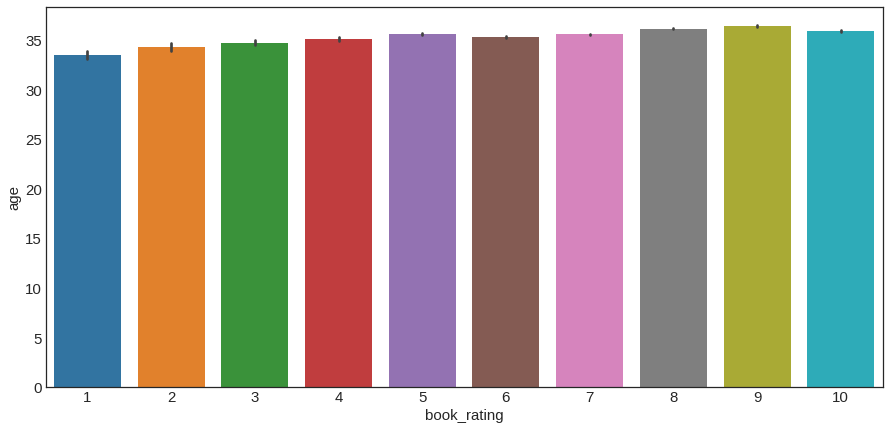

In [ ]:
fig=plt.figure(figsize=(15,7))
sns.barplot(x='book_rating',y='age',data=books_users_ratings)

Let's find out the books that the most active user is reading

In [ ]:
books_users_ratings[books_users_ratings['user_id']==11676].groupby(['book_title']).size().reset_index().sort_values(by=0,ascending=False)[:10]

,book_title,0
3876,Pet Sematary,4
688,Blessings,3
4838,The Bad Beginning (A Series of Unfortunate Eve...,3
2276,Harry Potter and the Chamber of Secrets (Book 2),3
4105,Remember Me,3
35,84 Charing Cross Road,3
6128,Tiger Eyes,3
5767,The Secret Garden,3
1117,Cradle and All,3
5891,The Testament,3


The most active year of publication

In [ ]:
top_year=books_users_ratings.groupby(['year_of_publication'])['book_rating'].size().reset_index().sort_values(by='book_rating',ascending=False)[:10]
top_year

,year_of_publication,book_rating
87,2002.0,37986
86,2001.0,32331
88,2003.0,29166
84,1999.0,29100
85,2000.0,28318
83,1998.0,24625
82,1997.0,21857
81,1996.0,21361
80,1995.0,19103
79,1994.0,16596


Text(0.5, 1.0, 'The most active year with most ratings')

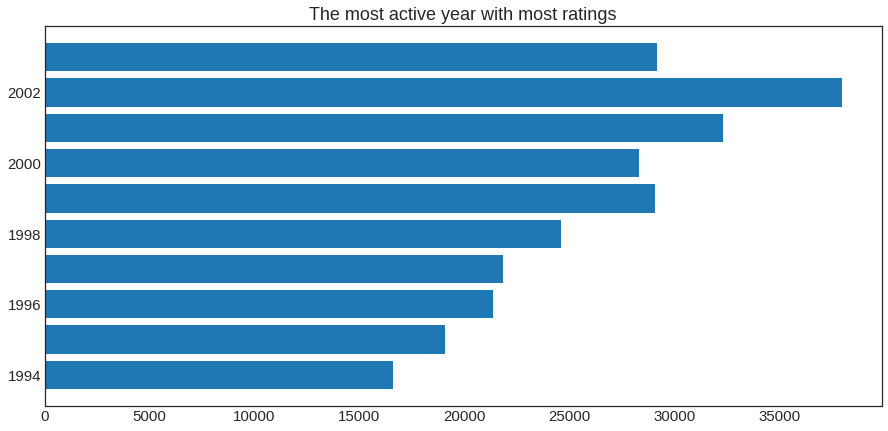

In [ ]:
plt.figure(figsize=(15,7))
plt.barh(top_year['year_of_publication'],top_year['book_rating'])
plt.title('The most active year with most ratings')

The authors with the most publications in the most active year

In [ ]:
books_users_ratings[books_users_ratings['year_of_publication']==2002]['book_author'].value_counts().reset_index().rename(columns={'index':'book_author','book_author':'count'}).sort_values(by='count',ascending=False)[:10]

,book_author,count
0,Alice Sebold,843
1,James Patterson,553
2,Nora Roberts,397
3,Janet Evanovich,323
4,Stephen King,317
5,John Grisham,317
6,Jennifer Weiner,264
7,Neil Gaiman,240
8,Emma McLaughlin,228
9,Nick Hornby,215


The publishing companies that recieved most business in the most active year

In [ ]:
books_users_ratings[books_users_ratings['year_of_publication']==2002]['publisher'].value_counts().reset_index().rename(columns={'index':'publisher','publisher':'count'}).sort_values(by='count',ascending=False)[:10]

,publisher,count
0,Ballantine Books,1308
1,Pocket,1197
2,"Little, Brown",1086
3,Berkley Publishing Group,857
4,Warner Books,857
5,HarperTorch,845
6,Perennial,756
7,Harlequin,749
8,Signet Book,727
9,Avon,682


The top countries in the most active year

In [ ]:
books_users_ratings[books_users_ratings['year_of_publication']==2002]['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})[:10]

,country,count
0,usa,26761
1,canada,2803
2,germany,1544
3,united kingdom,1252
4,n/a,646
5,spain,645
6,france,573
7,australia,513
8,portugal,308
9,switzerland,236


Authors belonging to the same publishing company

In [ ]:
pd.DataFrame(books_users_ratings.groupby(['publisher'])['book_author'].value_counts()).rename(columns={'book_author':'Count'})[:40]

Count
publisher                                          book_author                     
 Editions P. Terrail                               Laure Meyer                    1
 Tri-State Press                                   Isabel Jansen                  1
'K' Pub                                            Khadijah Hashim                1
10-18                                              Arthur Upfield                11
                                                   Lilian Jackson Braun           6
                                                   Joseph Bedier                  4
                                                   Hubert Selby                   3
                                                   Anne de Leseleuc               2
                                                   Bret Easton Ellis              2
                                                   Robert Van Gulik               2
                                                   Amanda Cross                   1
                                                   Edith Wharton                  1
                                                   Edward Morgan Forster          1
                                                   Elena Arseneva                 1
                                                   George Orwell                  1
                                                   Hanif Kureishi                 1
                                                   J-J Rousseau                   1
                                                   Patricia Wentworth             1
                                                   Tom Sharpe                     1
10/18                                              Boris Akounine                 2
                                                   Haruki Murakami                2
                                                   Ethan Canin                    1
                                                   Herbjorg Wassmo                1
                                                   Iain Pears                     1
                                                   Jean-Francois Parot            1
                                                   Kazuo Ishiguro                 1
                                                   Pedro Juan Gutierrez           1
10/18 UGE                                          Iain Pears                     3
10/18 Uge                                          Christopher Isherwood          1
1001 nuits                                         Attac                          1
101 Productions                                    George Ashley                  1
101 Productions; [distributed by Scribner, New ... Gertrude Harris                1
101 Productions; distributed by Scribner, New York Coralie Castle                 1
11/9 Publishing                                    Linda Cracknell                1
1stBooks Library                                   D. J. Hernandez                3
                                                   E. L. Burton                   3
                                                   Allison Pollack Alexander      2
                                                   C. Todd Cleveland              2
                                                   Dale Tibbils                   2
                                                   Eva Dillner                    2

Publishing companies that recieved the most business from the same author

In [ ]:
pd.DataFrame(books_users_ratings.groupby(['publisher'])['book_author'].value_counts()).rename(columns={'book_author':'Count'}).sort_values(by='Count',ascending=False)[:10]

,,Count
publisher,book_author,
Signet Book,Stephen King,1593
Jove Books,Nora Roberts,1342
Scholastic,J. K. Rowling,1152
Warner Books,Nicholas Sparks,966
Silhouette,Nora Roberts,952
Berkley Publishing Group,Tom Clancy,926
Dell Publishing Company,John Grisham,925
Ballantine Books,Anne Rice,900
Berkley Publishing Group,Dean R. Koontz,893


user_id                   0
isbn                      0
book_rating               0
book_title                0
book_author               0
year_of_publication    2433
publisher                 0
unique_isbn               0
age                       0
city                      0
state                     0
country                5563

AGE WISE PREFERENCE OF BOOKS

In [ ]:
age_pref=pd.DataFrame(books_users_ratings.groupby(['age'])['book_title'].value_counts()).rename(columns={'book_title':'count'}).sort_values(by='count', ascending=False)
age_pref=age_pref.reset_index()
age_pref[age_pref['age']==22]

,age,book_title,count
1205,22,Wild Animus,12
1381,22,Bridget Jones's Diary,11
1382,22,1984,11
1870,22,The Lovely Bones: A Novel,9
2259,22,Life of Pi,8
...,...,...,...
217432,22,The Stone Diaries,1
217433,22,The Store,1
217434,22,The Stories of Raymond Carver: Will You Please...,1
217435,22,The Story Girl (Classic),1


In [ ]:
pd.DataFrame(books_users_ratings.groupby(['age'])['book_author'].value_counts()).rename(columns={'book_author':'count'}).sort_values(by='count', ascending=False).reset_index()

,age,book_author,count
0,34,Stephen King,1296
1,34,John Grisham,936
2,34,Nora Roberts,902
3,34,James Patterson,886
4,34,Mary Higgins Clark,674
...,...,...,...
172987,34,Alex Anderson,1
172988,34,Alex Golson,1
172989,34,Alev Lytle Croutier,1
172990,34,Alessandro Gomarasca,1


COUNTRY WISE PREFERENCE OF BOOKS

In [ ]:
country_pref=pd.DataFrame(books_users_ratings.groupby(['country'])['book_title'].value_counts()).rename(columns={'book_title':'count'}).sort_values(by='count', ascending=False)
country_pref=country_pref.reset_index()
country_pref

,country,book_title,count
0,usa,The Lovely Bones: A Novel,531
1,usa,The Da Vinci Code,396
2,usa,The Secret Life of Bees,360
3,usa,The Nanny Diaries: A Novel,321
4,usa,A Painted House,309
...,...,...,...
176234,netherlands,Cruel &amp; Unusual (Kay Scarpetta Mysteries (...,1
176235,netherlands,Crossings (Buffy the Vampire Slayer),1
176236,netherlands,Crime and Punishment (Wordsworth Classics),1
176237,netherlands,Cries in the Desert (St. Martin's True Crime L...,1


In [ ]:
pd.DataFrame(books_users_ratings.groupby(['country'])['book_author'].value_counts()).rename(columns={'book_author':'count'}).sort_values(by='count', ascending=False).reset_index()

,country,book_author,count
0,usa,Stephen King,3321
1,usa,Nora Roberts,2400
2,usa,James Patterson,1918
3,usa,John Grisham,1838
4,usa,J. K. Rowling,1344
...,...,...,...
96242,netherlands,Marc Behm,1
96243,netherlands,Malcom Bradbury,1
96244,netherlands,Malcolm Godden,1
96245,netherlands,Malaclypse,1


**MODEL BUILDING**

Collaborative filtering use similarities of the 'user' and 'item' fields, with values of 'rating' predicted based on either user-item, or item-item similarity:

Item-Item CF: "Users who liked this item also liked..."

User-Item CF: "Users who are similar to you also liked..."

In both cases, we need to create a user-item matrix built from the entire dataset. We'll create a matrix for each of the training and testing sets, with the users as the rows, the books as the columns, and the rating as the matrix value. Note that this will be a very sparse matrix, as not every user will have watched every movie etc.

We'll first create a new dataframe that contains only the relevant columns (user_id, unique_isbn, and book_rating).

In [ ]:
user_item_rating = books_users_ratings[['user_id', 'unique_isbn', 'book_rating']]
user_item_rating.head()

,user_id,unique_isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)

In [ ]:
print(f'Training set size: {len(train_data)}')
print(f'Testing set size: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set size: 307052
Testing set size: 76763
Test set is 20% of the full dataset.


**Map the user_id and unique_isbn fields to sequential integers for matrix processing**

In [ ]:
### TRAINING SET
# Get int mapping for user_id
u_unique_train = train_data.user_id.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}
# Get int mapping for unique_isbn
b_unique_train = train_data.unique_isbn.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_book2idx = {o:i for i, o in enumerate(b_unique_train)}

### TESTING SET
# Get int mapping for user_id
u_unique_test = test_data.user_id.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}
# Get int mapping for unique_isbn
b_unique_test = test_data.unique_isbn.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_book2idx = {o:i for i, o in enumerate(b_unique_test)}

In [ ]:
### TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['b_unique'] = train_data['unique_isbn'].map(train_data_book2idx)

### TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['b_unique'] = test_data['unique_isbn'].map(test_data_book2idx)

### Convert back to 3-column df
train_data = train_data[['u_unique', 'b_unique', 'book_rating']]
test_data = test_data[['u_unique', 'b_unique', 'book_rating']]

In [ ]:
train_data.tail()

,u_unique,b_unique,book_rating
792421,59917,21050,9
1121533,3065,1771,5
660016,13859,116952,5
320982,223,116953,10
974702,131,77477,8


Although this collaborative filtering setup is relatively simple to write, it doesn't scale very well at all for spare datasets

Instead, we should really use a model-based (based on matrix factorization) recommendation algorithm. These are inherently more scalable and can deal with higher sparsity level than memory-based models, and are considered more powerful due to their ability to pick up on "latent factors" in the relationships between what sets of items users like. However, they still suffer from the "cold start" problem (where a new user has no history).

Fortunately, there is a Python library called surprise that was built specifically for the implementation of model-based recommendation systems! This library comes with many of the leading algorithms in this space already built-in. Let's try use it for our book recommender system.

**10 BOOK TITLES THAT IS LIKELY TO BE RATED HIGHLY BY THE USER**

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366478 sha256=a6a647a2d5cd3808e869872a34df9bc515e8721d542b919f2d45326672242f25
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset

In [ ]:
user_item_rating.head() # take a look at our data

,user_id,unique_isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
# First need to create a 'Reader' object to set the scale/limit of the ratings field
reader = Reader(rating_scale=(1, 10))

# Load the data into a 'Dataset' object directly from the pandas df.
# Note: The fields must be in the order: user, item, rating
data = Dataset.load_from_df(user_item_rating, reader)

In [ ]:
# Load the models and 'evaluation' method
from surprise import SVD, NMF, model_selection, accuracy

In [ ]:
# Load SVD algorithm
model = SVD()

# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6322  1.6390  1.6301  1.6377  1.6409  1.6360  0.0041  
Fit time          14.46   11.58   8.58    8.07    9.70    10.48   2.33    
Test time         2.03    1.00    0.75    0.68    0.69    1.03    0.51    
CPU times: user 1min 1s, sys: 828 ms, total: 1min 1s
Wall time: 1min 9s


{'test_rmse': array([1.63220433, 1.63901973, 1.63009379, 1.63773636, 1.6408924 ]),
 'fit_time': (14.460082054138184,
  11.581509351730347,
  8.583776712417603,
  8.07283639907837,
  9.695007801055908),
 'test_time': (2.0327558517456055,
  0.9975574016571045,
  0.7483711242675781,
  0.6840507984161377,
  0.6902010440826416)}

In [ ]:
# set test set to 20%.
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# Instantiate the SVD model.
model = SVD()

# Train the algorithm on the training set, and predict ratings for the test set
model.fit(trainset)
predictions = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)


RMSE: 1.6362


1.6362216210472476

In [ ]:
# Load NMF algorithm
model = NMF()
# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.4607  2.4801  2.4578  2.4667  2.4813  2.4693  0.0098  
Fit time          29.10   24.54   27.21   24.79   25.52   26.23   1.71    
Test time         1.24    0.72    1.15    0.72    1.19    1.00    0.23    
CPU times: user 2min 20s, sys: 920 ms, total: 2min 21s
Wall time: 2min 26s


{'test_rmse': array([2.46069919, 2.48012184, 2.4577751 , 2.46670829, 2.48134732]),
 'fit_time': (29.103069305419922,
  24.538553476333618,
  27.213252305984497,
  24.787904977798462,
  25.521520137786865),
 'test_time': (1.238288402557373,
  0.7212045192718506,
  1.1524658203125,
  0.7161996364593506,
  1.1909441947937012)}

In [ ]:
# We'll remake the training set, keeping 20% for testing
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

In [ ]:
### Fine-tune Surprise SVD model useing GridSearchCV
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [80, 100, 120], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.01, 0.02, 0.04]}

# Optimize SVD algorithm for both root mean squared error ('rmse') and mean average error ('mae')
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

In [ ]:
# Fit the gridsearch result on the entire dataset
%time gs.fit(data)

CPU times: user 11min 17s, sys: 6.94 s, total: 11min 24s
Wall time: 11min 21s


In [ ]:
# Return the best version of the SVD algorithm
model = gs.best_estimator['rmse']

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6380138215450624
{'n_factors': 80, 'lr_all': 0.005, 'reg_all': 0.04}


In [ ]:
model_selection.cross_validate(model, data, measures=['rmse', 'mae'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6354  1.6222  1.6269  1.6390  1.6294  1.6306  0.0060  
MAE (testset)     1.2626  1.2516  1.2570  1.2659  1.2574  1.2589  0.0049  
Fit time          7.64    7.84    8.01    7.86    8.30    7.93    0.22    
Test time         0.70    0.67    1.21    0.71    1.25    0.91    0.26    


{'test_rmse': array([1.63539158, 1.62216175, 1.62686106, 1.63904001, 1.62936252]),
 'test_mae': array([1.2626113 , 1.25161592, 1.25696621, 1.26588038, 1.2573566 ]),
 'fit_time': (7.641141653060913,
  7.837216138839722,
  8.009201526641846,
  7.856614112854004,
  8.300723552703857),
 'test_time': (0.6971704959869385,
  0.6725625991821289,
  1.207442283630371,
  0.7139160633087158,
  1.245548963546753)}

In [ ]:
### Use the new parameters with the training set
model = SVD(n_factors=80, lr_all=0.005, reg_all=0.04)
model.fit(trainset) # re-fit on only the training data using the best hyperparameters
test_pred = model.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD : Test Set
RMSE: 1.6342


1.6342100880173949

In [ ]:
# get a prediction for specific users and items.
uid = 276744  # the user_id int
iid = '038550120X' # the unique_isbn string
# This pair has an actual rating of 5!

In [ ]:
pred = model.predict(uid, iid, verbose=True)
pred

user: 276744     item: 038550120X r_ui = None   est = 7.32   {'was_impossible': False}


Prediction(uid=276744, iid='038550120X', r_ui=None, est=7.322459983070732, details={'was_impossible': False})

In [ ]:
print(f'The estimated rating for the book with the "unique_isbn" code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg =  pd.DataFrame(user_item_rating[(user_item_rating.user_id==pred.uid) & (user_item_rating.unique_isbn==pred.iid)].book_rating).iloc[0,0]
print(f'The real rating given for this was {actual_rtg}.')

The estimated rating for the book with the "unique_isbn" code 038550120X from user #276744 is 7.32.

The real rating given for this was 7.


In [ ]:
 pd.DataFrame(user_item_rating[(user_item_rating.user_id==pred.uid) & (user_item_rating.unique_isbn==pred.iid)].book_rating).iloc[0,0]

7

In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [ ]:
pred = model.test(testset)
top_n = get_top_n(pred)

In [ ]:
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(predictions, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = books_users_ratings.loc[books_users_ratings.unique_isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [ ]:
# Just take a random look at user_id=60337
example_reading_list = get_reading_list(userid=60337)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

The Autobiography of Malcolm X: 9.342012221010547
Go Tell It on the Mountain: 9.242080091989687
Grace For The Moment: 9.110110637373792
Shoes: A Celebration of Pumps, Sandals, Slippers &amp; More: 8.93382495323061
Windchill Summer: 8.755264120099469
A Natural History of the Senses: 8.655399415687397
Love Alone (National Forum on Science and Technology Goals): 8.614880191155944
The Women Who Hate Me: Poetry 1980-1990: 8.60780303569356
MS Guide Womans Healt: 8.603740388916606
The Writing Life: 8.570179581606142
